Consider the data present in the Insurance dataset file.<br>
Following is the attribute related information:<br><br>

age: age of primary beneficiary<br>
sex: insurance contractor gender, female, male<br>
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9<br>
children: Number of children covered by health insurance / Number of dependents<br>
smoker: Smoking, yes or no<br>
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.<br>
charges: Individual medical costs billed by health insurance<br><br>

Problem statement: To predict the approximate insurance cost based upon the rest of the features provided for each individual.

Import the libraries- Pandas, Numpy, Matplotlib and Seaborn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dataframe named "data" from the given datafile and print it's head

In [2]:
data= pd.read_csv("datasets_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Understand the problem statement and the data, try understanding importance of each variable given.<br>
Perform Exploratory Data Analysis- print datatypes, dimension and descriptive statistics.

In [3]:
data.shape

(1338, 7)

In [4]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Check if there are missing values. If yes, handle them.

In [7]:
pd.isnull(data).sum()   ### No missing value here 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Check for Assumption 1- There should be no outliers in the data.<br>
Hint: Think logically, nothing needs to be worked upon here.

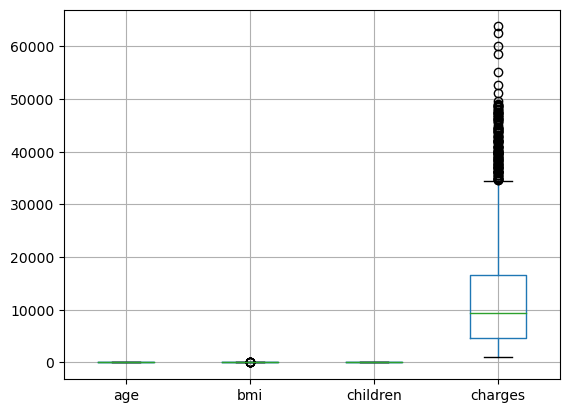

In [8]:
data.boxplot();
plt.show()


#colname=[]
#for x in data,columns:
#if data[x].dtype=='int64' or  data[x].dtype=='float64'
#colname.append(x)

#for x in colname:
#data.boxplot(column=x)
#plt.show


# Check for Assumption 2-Assumption of Linearity<br>
Hint: Use kind="scatter" in the pairplot, because it wont be able to fit a line in categorical variables. Some might show no relationship, but remember they are categorical or important variables, leave it as it is.

In [9]:
import warnings
warnings.filterwarnings('ignore')

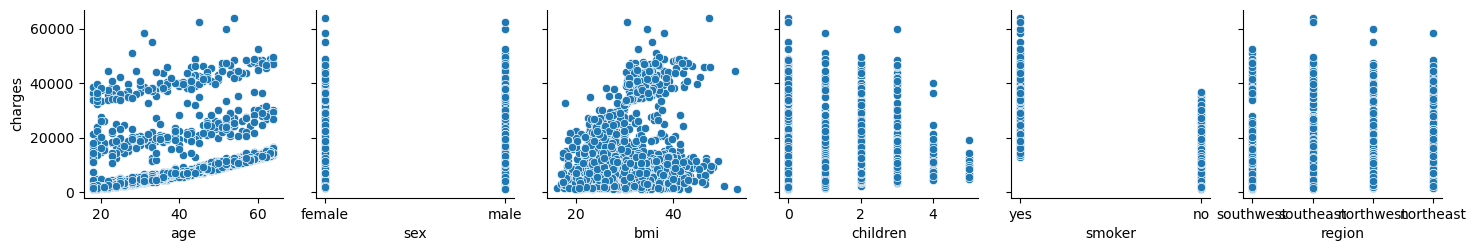

In [10]:
sns.pairplot(data,x_vars=['age','sex','bmi', 'children', 'smoker','region'],
            y_vars=['charges'],kind='scatter')
plt.show()

# Create X and Y

In [11]:
X = data.loc[:,['age', 'sex','bmi', 'children', 'smoker','region']]    
Y = data.loc[:,'charges']

In [12]:
print(X.shape)
print(Y.shape)

(1338, 6)
(1338,)


# Check for Assumption 3-Assumption of Normality <br>
Hint: You will find the data is highly positively skewed. So log transform the data.

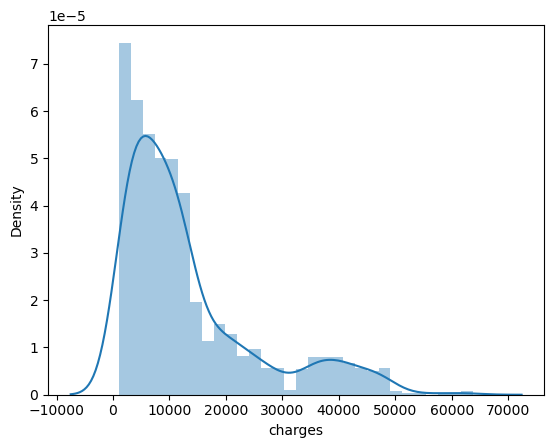

In [13]:
sns.distplot(Y)
plt.show()               

In [14]:
Y_log = np.log(Y)


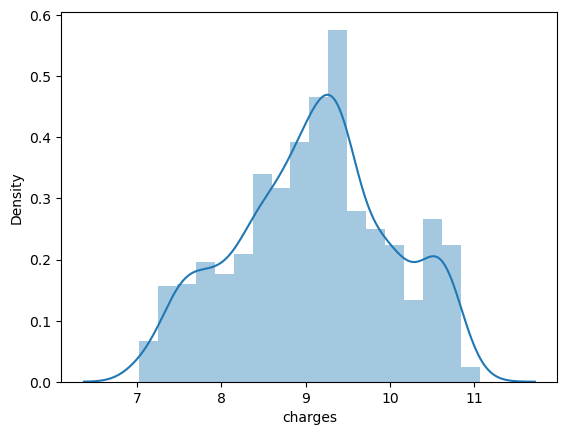

In [15]:
sns.distplot(Y_log)
plt.show()

In [16]:
data.sex.replace({"female":0,"male":1}, inplace=True)
data.smoker.replace({"no":0,"yes":1}, inplace=True)
data.region.replace({"northeast":0,"northwest":1,'southeast':2,'southwest':3}, inplace=True)

#X['sex'] = X.sex.map({'male':1,'female:0'})


In [17]:
X = data.loc[:,['age', 'sex','bmi', 'children', 'smoker','region']]
Y = data.loc[:,'charges']

In [18]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Check for the normality in the X variables. <br>
Hint: Some variables make not look normal but realize that they are actually discrete valued.
    No transformation required.

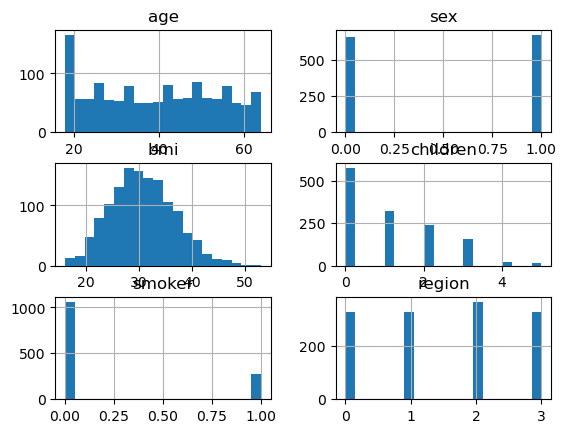

In [19]:
X.hist(bins=20)
plt.show() 

# Log level  model 

               age       sex       bmi  children    smoker    region
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000


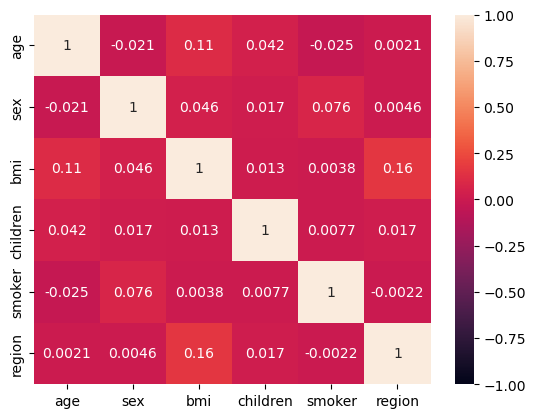

In [20]:
corr_data = X.corr(method='pearson')
print(corr_data)

sns.heatmap(corr_data,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_data = pd.DataFrame()
vif_data["features"] = X.columns
vif_data["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_data.round(2)

,features,VIF Factor
0,age,7.55
1,sex,2.00
2,bmi,10.37
3,children,1.80
4,smoker,1.26
5,region,2.92


Split the data into train and test.<br>
Hint: Make sure you are considering the log transformed Y.

In [22]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_log, test_size=0.2, 
                                                    random_state=10) 

In [23]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print()
print('Percent of train data',X_train.shape[0]/X.shape[0]*100)

(1070, 6)
(1070,)
(268, 6)
(268,)

Percent of train data 79.97010463378177


Build a base Linear Regression model using sklearn.

In [24]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)

print(lm.intercept_)
print(lm.coef_)

6.998797622591983
[ 0.03498834 -0.0711322   0.01259126  0.09962977  1.5693443  -0.03889152]


Create a zipped list of the slope coefficients to understand the equation better.<br>
Write down the equation manually and try making sense out of it.

In [25]:
print(list(zip(X.columns,lm.coef_)))

[('age', 0.034988341490764914), ('sex', -0.07113220005343104), ('bmi', 0.012591262605124005), ('children', 0.09962976583044043), ('smoker', 1.569344301966667), ('region', -0.03889151819958823)]


Predict using the model.

In [26]:
Y_pred=lm.predict(X_test)
print(Y_pred)

[ 8.90264566  8.55800249  9.44206862  9.37109228  8.30231857  8.93127398
  9.22860018  9.62770497  8.96169962 10.524292    8.12183109  8.270934
  8.75991467  9.14967223  9.23002002  9.36183759  8.32332991  9.81527793
  9.18395253 10.20908992 10.5308626   8.06726747  7.95992684  8.77128514
  8.43374205  9.41895434  9.01687327  9.41850025  8.42170066 10.20084299
  7.72507636 10.38861159  8.89576619  8.94511958  8.45447782  8.89057139
  9.43604078  9.09248396  9.09271164  8.89473802  9.58926813  9.15682789
  8.54484462  8.99761391  7.99767708  8.81979395  8.91337357 10.61798009
  9.30298176  9.24221911 10.01078002  8.31758485  8.90942155  9.62809789
  9.09900057  9.38167738  9.30538021  8.63050675  8.707771   10.70371838
  7.87802912 10.61635976 11.07322819  7.95757539  9.99650111  8.87336923
  8.47709653  8.90772216  8.86749958  8.92965431  8.81908517  7.95741791
  8.85051652  8.89426488  8.97913786  9.33234154  8.55732546  8.82884226
  7.81072893  9.33028012  9.26333526  9.18682528  9.7

Evaluate the model.

In [27]:
new_df=pd.DataFrame()
new_df=X_test.copy()
 
new_df["Actual charges"]=Y_test
new_df["Predicted charges"]=Y_pred
new_df=new_df.reset_index().drop("index", axis=1)

In [28]:
new_df

,age,sex,bmi,children,smoker,region,Actual charges,Predicted charges
0,37,0,27.740,3,0,1,8.893093,8.902646
1,36,0,26.885,0,0,1,8.569372,8.558002
2,59,1,37.100,1,0,3,9.421182,9.442069
3,61,0,25.080,0,0,2,10.106963,9.371092
4,29,0,26.030,0,0,1,8.225895,8.302319
...,...,...,...,...,...,...,...,...
263,50,1,34.200,2,1,3,10.665620,10.759633
264,26,0,40.185,0,0,1,8.071295,8.375583
265,19,1,27.265,2,0,1,10.020989,8.096113
266,57,1,40.945,0,0,0,9.355851,9.437550


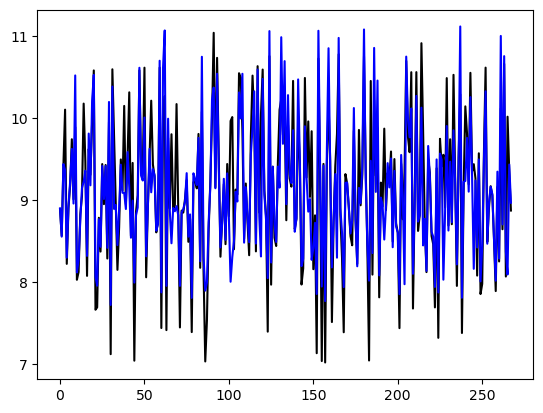

In [29]:
new_df['Actual charges'].plot(color='black')
new_df['Predicted charges'].plot(color='blue')
plt.show()

In [30]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)      #by formula
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7049534517624695
RMSE: 0.4882327185684708
Adj R-square: 0.7036234147305949


In [31]:
print(Y_test.min())
print(Y_test.max())

7.02275569117477
11.044406702204412


In [32]:
new_df["Residual"]=new_df["Actual charges"]-new_df["Predicted charges"]
new_df.to_excel("Charge Prediction.xlsx",header=True,index=True)
new_df.head()

,age,sex,bmi,children,smoker,region,Actual charges,Predicted charges,Residual
0,37,0,27.740,3,0,1,8.893093,8.902646,-0.009553
1,36,0,26.885,0,0,1,8.569372,8.558002,0.011369
2,59,1,37.100,1,0,3,9.421182,9.442069,-0.020886
3,61,0,25.080,0,0,2,10.106963,9.371092,0.735870
4,29,0,26.030,0,0,1,8.225895,8.302319,-0.076423


Perform Ridge and Lasso regression. Evaluate them as well.<br>
Hint:Look at the fun in the Lasso Regression, ignore such model.

In [33]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(X_train,Y_train)


print(rid.intercept_)
print(rid.coef_)

7.000415207061311
[ 0.03498462 -0.07025584  0.01259184  0.09952118  1.5602262  -0.03886915]


In [34]:
Y_pred = rid.predict(X_test)

In [35]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)      #by formula
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7052731948166413
RMSE: 0.487968097039376
Adj R-square: 0.7039445991509011


In [36]:
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(X_train,Y_train)

print(las.intercept_)
print(las.coef_)

7.895875452206857
[ 0.03043079  0.          0.          0.          0.         -0.        ]


In [37]:
Y_pred = las.predict(X_test)######################################################3

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)      #by formula
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.21387850856962531
RMSE: 0.7969415049819164
Adj R-square: 0.21033476029871445


In [38]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=1,l1_ratio=0)
en.fit(X_train,Y_train)


print(en.intercept_)
print(en.coef_)

7.284954685275571
[ 0.03436253  0.00416085  0.01250653  0.05521272  0.21700441 -0.02204249]


In [39]:
Y_pred = en.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)      #by formula
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.3642348076636188
RMSE: 0.7166877549950225
Adj R-square: 0.3613688488702166


Create a sample dataframe named "new_df" to hold just the training data for the statsmodels model.

In [40]:
new_df=pd.DataFrame()
new_df=X_train.copy()
 
new_df["charges"]=Y_train.copy()
new_df.shape

(1070, 7)

Build OLS model using statsmodels library. Check the summary to evaluate.<br>
Hint: No high p-values. <br>
Check for the Assumption 5- No autocorrelation 

In [41]:
import statsmodels.formula.api as sm
 
# create a fitted model with all three features
lm_model = sm.ols(formula='charges ~ age + bmi + children + smoker', 
                  data=new_df).fit()
 
# print the coefficients
print(lm_model.params)
print(lm_model.summary())


Intercept    6.942717
age          0.035128
bmi          0.011224
children     0.099109
smoker       1.562676
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     931.2
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:36:44   Log-Likelihood:                -629.11
No. Observations:                1070   AIC:                             1268.
Df Residuals:                    1065   BIC:                             1293.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------

Predict using the model. Evaluate the model.

In [42]:
Y_pred_new = lm_model.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred_new)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)      #by formula
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6950906742234528
RMSE: 0.4963259296582584
Adj R-square: 0.6937161768871198


Check for Assumption 6-Errors should be random.<br>
Hint: Diagnostic plot

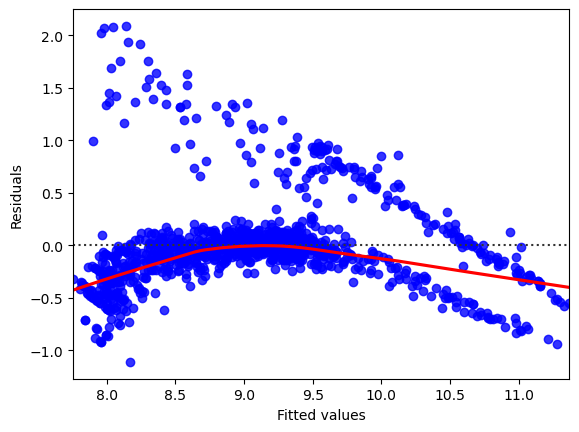

In [43]:
model_fitted_y = lm_model.fittedvalues
sns.residplot(x=model_fitted_y, y='charges', data=new_df,lowess=True,line_kws=dict(color="r"),color='b')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()


Check for Assumption 7-Errors should follow normal distribution.<br>
Hint: Diagnostic plot

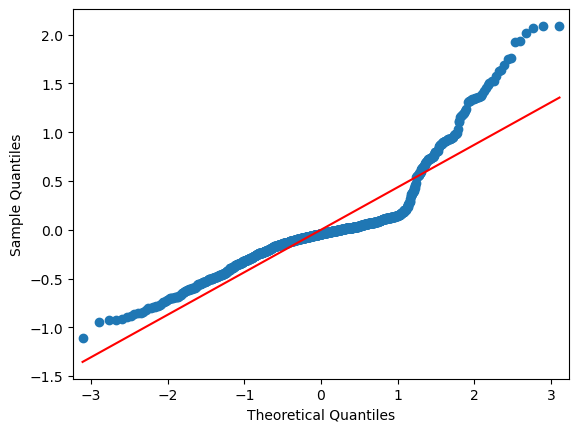

In [44]:
import statsmodels.api as sma
sma.qqplot(lm_model.resid, line='s')
plt.show()

Check for Assumption 8-Errors should follow constant variance.<br>
Hint: Diagnostic plot

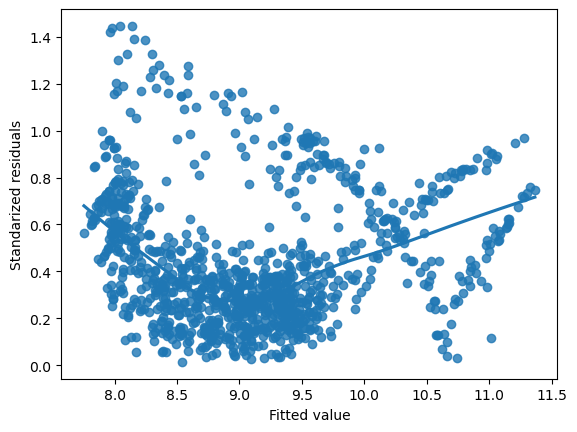

In [45]:
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(lm_model.resid))
 
sns.regplot(x=lm_model.fittedvalues,
            y=model_norm_residuals_abs_sqrt,
              scatter=True, lowess=True)        
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show()

# Project Ends here

Scale the data using Standard Scaler to prepare it for SGD.

Split the data into train and test.<br>
Hint: Make sure you are considering the log transformed Y.

Build the SGDRegressor.

Predict using the model. Evaluate the model. Perform trial and error to reach the optimum model.

Write down your conclusion as to which is the final model that you would go with along with the reasons.

In [ ]:
ridge is best

Once finalized the model, try predicting the following observations for me.<br>
Create the dataframe named "X_test_sample" using the given dictionary object.<br>

sample_data={"age":[56,51,31,64,44,43,56],
             "sex":[1,0,1,1,0,1,1],
             "bmi":[19.95,18.05,34.39,25.6,23.98,32.6,33.725],
             "children":[0,0,3,2,2,2,0],"smoker":[1,0,1,0,0,0,0],"region":[0,1,1,3,2,3,1]}





In [46]:
sample_data={"age":[56,51,31,64,44,43,56], "sex":[1,0,1,1,0,1,1], 
             "bmi":[19.95,18.05,34.39,25.6,23.98,32.6,33.725], 
             "children":[0,0,3,2,2,2,0],
             "smoker":[1,0,1,0,0,0,0],
             "region":[0,1,1,3,2,3,1]}
X_test_sample = sample_data

In [47]:
Y_pred_new = lm_model.predict(X_test_sample)
Y_pred_new

0    10.696476
1     8.936834
2    10.277690
3     9.676457
4     8.955719
5     9.017346
6     9.288416
dtype: float64

The predicted values would be log transformed.Convert them back to original values.<br>
Hint: Use np.exp()

In [48]:
pred_Y = np.exp(Y_pred_new)
pred_Y

0    44199.800468
1     7607.074169
2    29076.632844
3    15937.928002
4     7752.096104
5     8244.865433
6    10812.049238
dtype: float64

Save the predicted values along with the observations into an excel file.